In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_pat(patterns):
    num_patterns = len(patterns)
    for i, pattern in enumerate(patterns):
        plt.subplot(1, num_patterns, i + 1)
        plt.axis("off")
        plt.imshow(np.array(pattern).reshape(4, 4), cmap="gray_r")
    plt.show()

In [3]:
def f(s, T):
    return np.clip(s, 0, T)

In [4]:
def hamming_network(patterns, test_vector, E_max):
    N = len(patterns[0])  # розмірність патерна
    M = len(patterns)     # кількість патернів
    T = 0.5 * N
    
    W = np.array([0.5 * np.array(p) for p in patterns])
    
    # Обчислюємо вхід
    s = W @ test_vector
    print(s)
    y = f(s, T)
    print(y)
    
    # задаємо значення синапсисів нейронів другого шару мережі
    second_layer = np.ones((M, M)) * (-0.1)
    np.fill_diagonal(second_layer, 1)
    
    y2 = y.copy()
    for i in range(100):
        y_new = f(y2 - second_layer @ y2, T)
        stability = np.linalg.norm(y_new - y2)
        print("\nІтерація ", i)
        print("y_new = ", y_new)
        print("Умова стабілізації: ", stability)
        if stability <= E_max:
            break
        y2 = y_new
    print("Стабільна векторна форма: ", y2)
    return int(np.argmax(y2))

In [5]:
exemplars = [
    [1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1],
    [1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1]
]
t1 = exemplars[0][::-1]
t1[0] = 1
t1[3] = 1
t1[2] = -1

test_vectors = [
    t1, 
    exemplars[0][::-1],
    exemplars[1][::-1],
    [-1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1],
    [ 1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1],
    [ 1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1],
    [-1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1]
]
E_max = 1e-3

[3. 1.]
[3. 1.]

Ітерація  0
y_new =  [0.1 0.3]
Умова стабілізації:  2.9832867780352594

Ітерація  1
y_new =  [0.03 0.01]
Умова стабілізації:  0.298328677803526

Ітерація  2
y_new =  [0.001 0.003]
Умова стабілізації:  0.029832867780352594

Ітерація  3
y_new =  [0.0003 0.0001]
Умова стабілізації:  0.0029832867780352594

Ітерація  4
y_new =  [1.e-05 3.e-05]
Умова стабілізації:  0.00029832867780352603
Стабільна векторна форма:  [0.0003 0.0001]
Вектор схожий на еталоний вектор під індексом 0


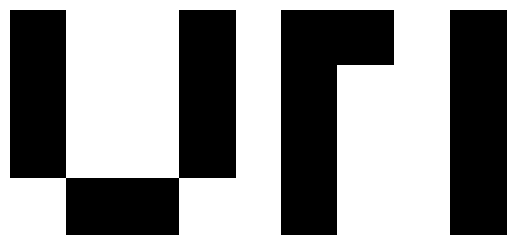

[0. 0.]
[0. 0.]

Ітерація  0
y_new =  [0. 0.]
Умова стабілізації:  0.0
Стабільна векторна форма:  [0. 0.]
Вектор схожий на еталоний вектор під індексом 0


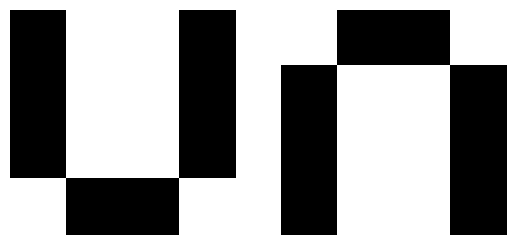

[ 0. -4.]
[0. 0.]

Ітерація  0
y_new =  [0. 0.]
Умова стабілізації:  0.0
Стабільна векторна форма:  [0. 0.]
Вектор схожий на еталоний вектор під індексом 0


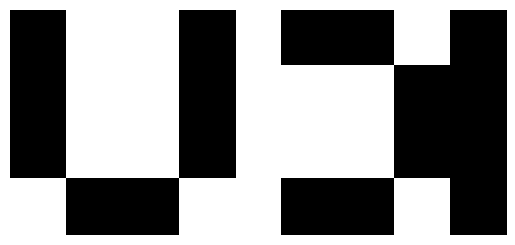

[-2. -2.]
[0. 0.]

Ітерація  0
y_new =  [0. 0.]
Умова стабілізації:  0.0
Стабільна векторна форма:  [0. 0.]
Вектор схожий на еталоний вектор під індексом 0


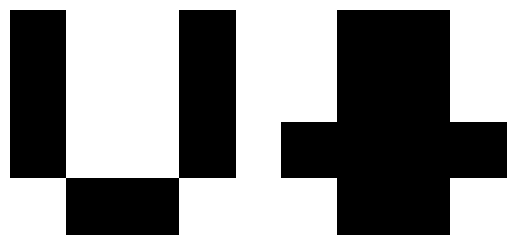

[-4.  2.]
[0. 2.]

Ітерація  0
y_new =  [0.2 0. ]
Умова стабілізації:  2.009975124224178

Ітерація  1
y_new =  [0.   0.02]
Умова стабілізації:  0.2009975124224178

Ітерація  2
y_new =  [0.002 0.   ]
Умова стабілізації:  0.020099751242241785

Ітерація  3
y_new =  [0.     0.0002]
Умова стабілізації:  0.0020099751242241785

Ітерація  4
y_new =  [2.e-05 0.e+00]
Умова стабілізації:  0.00020099751242241788
Стабільна векторна форма:  [0.     0.0002]
Вектор схожий на еталоний вектор під індексом 1


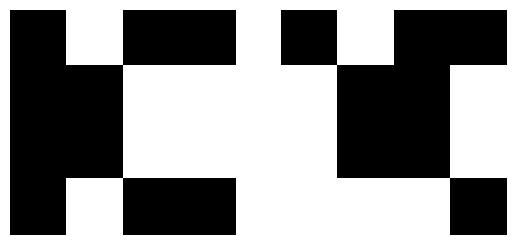

[0. 2.]
[0. 2.]

Ітерація  0
y_new =  [0.2 0. ]
Умова стабілізації:  2.009975124224178

Ітерація  1
y_new =  [0.   0.02]
Умова стабілізації:  0.2009975124224178

Ітерація  2
y_new =  [0.002 0.   ]
Умова стабілізації:  0.020099751242241785

Ітерація  3
y_new =  [0.     0.0002]
Умова стабілізації:  0.0020099751242241785

Ітерація  4
y_new =  [2.e-05 0.e+00]
Умова стабілізації:  0.00020099751242241788
Стабільна векторна форма:  [0.     0.0002]
Вектор схожий на еталоний вектор під індексом 1


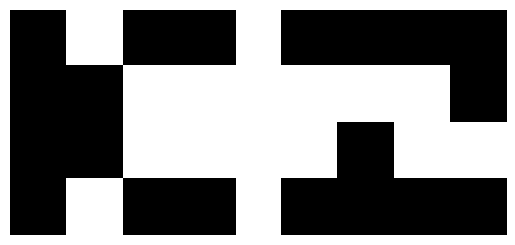

[0. 2.]
[0. 2.]

Ітерація  0
y_new =  [0.2 0. ]
Умова стабілізації:  2.009975124224178

Ітерація  1
y_new =  [0.   0.02]
Умова стабілізації:  0.2009975124224178

Ітерація  2
y_new =  [0.002 0.   ]
Умова стабілізації:  0.020099751242241785

Ітерація  3
y_new =  [0.     0.0002]
Умова стабілізації:  0.0020099751242241785

Ітерація  4
y_new =  [2.e-05 0.e+00]
Умова стабілізації:  0.00020099751242241788
Стабільна векторна форма:  [0.     0.0002]
Вектор схожий на еталоний вектор під індексом 1


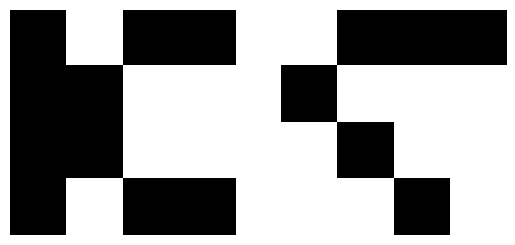

In [6]:
for test_vector in test_vectors:
    ind = hamming_network(exemplars, test_vector, E_max)
    print(f"Вектор схожий на еталоний вектор під індексом {ind}")
    print_pat([exemplars[ind], test_vector])